In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Netflix dataset (upload your CSV file to Colab first)
df = pd.read_csv("netflix_customer_churn.csv")

# Quick look
print(df.head())

# Drop customer_id (non-numeric)
df = df.drop('customer_id', axis=1)

# Encode categorical features
cat_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separate features and label
X = df.drop('churned', axis=1)
y = df['churned']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing done. Feature matrix shape:", X_scaled.shape)

                            customer_id  age  gender subscription_type  \
0  a9b75100-82a8-427a-a208-72f24052884a   51   Other             Basic   
1  49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47   Other          Standard   
2  4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27  Female          Standard   
3  d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53   Other           Premium   
4  4e265c34-103a-4dbb-9553-76c9aa47e946   56   Other          Standard   

   watch_hours  last_login_days   region  device  monthly_fee  churned  \
0        14.73               29   Africa      TV         8.99        1   
1         0.70               19   Europe  Mobile        13.99        1   
2        16.32               10     Asia      TV        13.99        0   
3         4.51               12  Oceania      TV        17.99        1   
4         1.89               13   Africa  Mobile        13.99        1   

  payment_method  number_of_profiles  avg_watch_time_per_day favorite_genre  
0      Gift Card                

PCA reduced shape: (5000, 11)


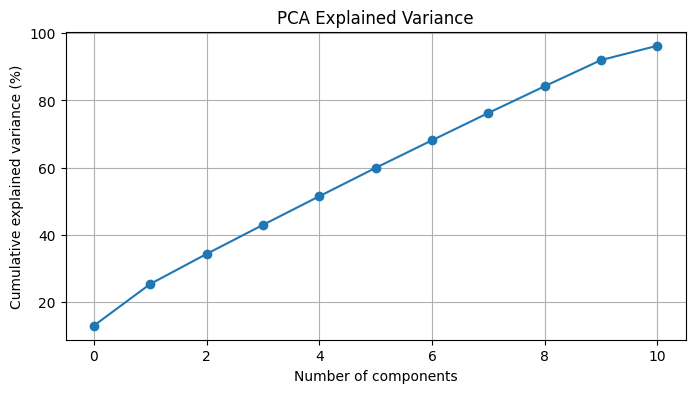

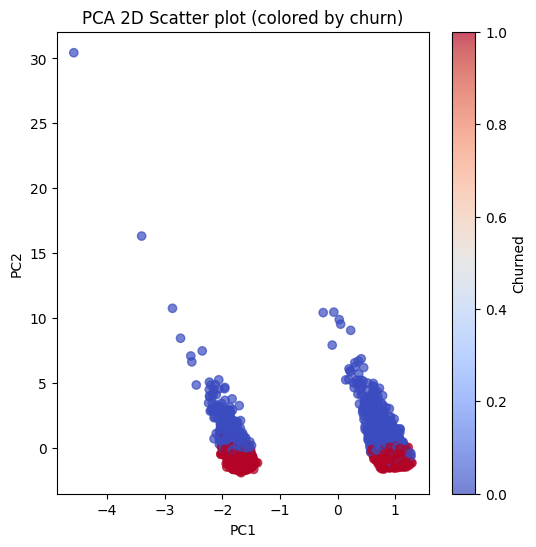

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA (keep enough components to explain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("PCA reduced shape:", X_pca.shape)

# Plot explained variance ratio
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance (%)')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# 2D scatter plot using first two principal components
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Scatter plot (colored by churn)')
plt.colorbar(label='Churned')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE result shape: (5000, 2)


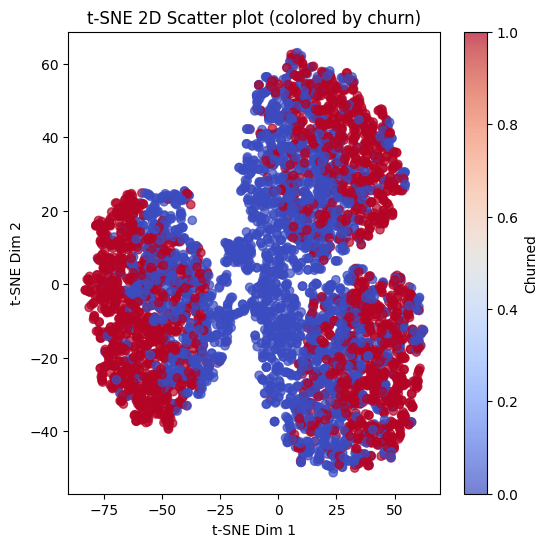

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE on scaled features (perplexity=30 is default)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

print("t-SNE result shape:", X_tsne.shape)

# 2D scatter plot of t-SNE embedding
plt.figure(figsize=(6,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.title('t-SNE 2D Scatter plot (colored by churn)')
plt.colorbar(label='Churned')
plt.show()
